# QG and SQG spectra: freely evolving turbulence

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pyqg
from pyqg import sqg_model
from pyqg import diagnostic_tools as tools

import xarray

import pyfftw

In [2]:
L    = 2.*np.pi
Nx   = 256
beta = 0.
H    = 1.
rek  = 0.
rd   = None
tmax = 40
dt   = 0.001
taveint = 1

In [3]:
m_qg = pyqg.BTModel(L=L, nx=Nx, beta=beta, H=H, rek=rek, rd=rd, tmax=tmax, dt=dt, taveint=taveint)

m_sqg = sqg_model.SQGModel(L=L, nx=Nx, beta=beta, H=H, tmax = tmax, dt=dt, taveint=taveint,
        twrite=400)

INFO:  Logger initialized
INFO:  Logger initialized


In [4]:
fk = m_qg.wv != 0
ckappa = np.zeros_like(m_qg.wv2)
ckappa[fk] = np.sqrt( m_qg.wv2[fk]*(1. + (m_qg.wv2[fk]/36.)**2) )**-1
nhx,nhy = m_qg.wv2.shape

In [5]:
Pi_hat = np.random.randn(nhx,nhy)*ckappa +1j*np.random.randn(nhx,nhy)*ckappa

Pi = m_qg.ifft( Pi_hat[np.newaxis,:,:] )
Pi = Pi - Pi.mean()
Pi_hat = m_qg.fft( Pi )
KEaux = m_qg.spec_var( m_qg.wv*Pi_hat )
pih = ( Pi_hat/np.sqrt(KEaux) )

qih = -m_qg.wv2*pih
qi = m_qg.ifft(qih)

bih = m_sqg.wv*pih
bi = m_sqg.ifft(bih)

Max PV  initial =  61.19353403499507
Max B   initial =  3.4118429671714883
Max Psi initial =  0.00021850628113688337


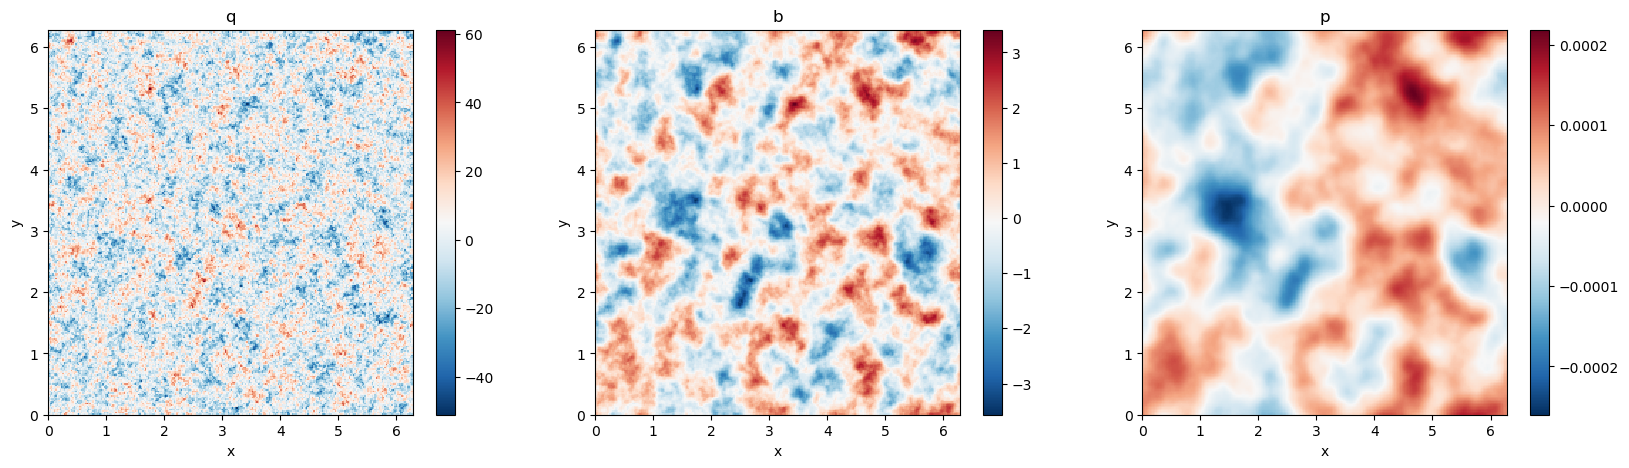

In [6]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.pcolormesh(m_qg.x, m_qg.y, qi[0,:,:], cmap='RdBu_r')
plt.colorbar()
plt.title('q')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(132)
plt.pcolormesh(m_sqg.x, m_sqg.y, bi[0,:,:], cmap='RdBu_r')
plt.colorbar()
plt.title('b')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(133)
plt.pcolormesh(m_qg.x, m_qg.y, Pi[0,:,:], cmap='RdBu_r')
plt.colorbar()
plt.title('p')
plt.xlabel('x')
plt.ylabel('y')

print('Max PV  initial = ', np.max(qi))
print('Max B   initial = ', np.max(bi))
print('Max Psi initial = ', np.max(Pi))

In [7]:
# initialize the model with that initial condition
m_qg.set_q(qi)

m_sqg.set_q(bi)

In [8]:
# define a quick function for plotting and visualize the initial condition
def plot_q(m, qmax=40):
    fig, ax = plt.subplots()
    pc = ax.pcolormesh(m.x,m.y,m.q.squeeze(), cmap='RdBu_r')
    pc.set_clim([-qmax, qmax])
    ax.set_xlim([0, 2*np.pi])
    ax.set_ylim([0, 2*np.pi]);
    ax.set_aspect(1)
    plt.colorbar(pc)
    plt.title('Time = %g' % m.t)
    plt.show()

def plot_b(m, bmax=4):
    fig, ax = plt.subplots()
    pc = ax.pcolormesh(m.x,m.y,m.q.squeeze(), cmap='RdBu_r')
    pc.set_clim([-bmax, bmax])
    ax.set_xlim([0, 2*np.pi])
    ax.set_ylim([0, 2*np.pi]);
    ax.set_aspect(1)
    plt.colorbar(pc)
    plt.title('Time = %g' % m.t)
    plt.show()

INFO: Step: 1000, Time: 1.00e+00, KE: 4.96e-01, CFL: 0.108
INFO: Step: 2000, Time: 2.00e+00, KE: 4.95e-01, CFL: 0.106
INFO: Step: 3000, Time: 3.00e+00, KE: 4.94e-01, CFL: 0.113
INFO: Step: 4000, Time: 4.00e+00, KE: 4.93e-01, CFL: 0.102
INFO: Step: 5000, Time: 5.00e+00, KE: 4.93e-01, CFL: 0.102
INFO: Step: 6000, Time: 6.00e+00, KE: 4.93e-01, CFL: 0.100
INFO: Step: 7000, Time: 7.00e+00, KE: 4.93e-01, CFL: 0.142
INFO: Step: 8000, Time: 8.00e+00, KE: 4.92e-01, CFL: 0.129
INFO: Step: 9000, Time: 9.00e+00, KE: 4.92e-01, CFL: 0.103
INFO: Step: 10000, Time: 1.00e+01, KE: 4.92e-01, CFL: 0.100


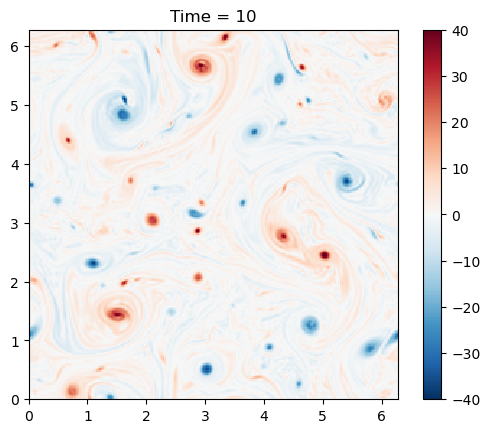

INFO: Step: 11000, Time: 1.10e+01, KE: 4.92e-01, CFL: 0.106
INFO: Step: 12000, Time: 1.20e+01, KE: 4.92e-01, CFL: 0.109
INFO: Step: 13000, Time: 1.30e+01, KE: 4.92e-01, CFL: 0.114
INFO: Step: 14000, Time: 1.40e+01, KE: 4.92e-01, CFL: 0.125
INFO: Step: 15000, Time: 1.50e+01, KE: 4.92e-01, CFL: 0.106
INFO: Step: 16000, Time: 1.60e+01, KE: 4.92e-01, CFL: 0.097
INFO: Step: 17000, Time: 1.70e+01, KE: 4.92e-01, CFL: 0.103
INFO: Step: 18000, Time: 1.80e+01, KE: 4.92e-01, CFL: 0.110
INFO: Step: 19000, Time: 1.90e+01, KE: 4.92e-01, CFL: 0.094
INFO: Step: 20000, Time: 2.00e+01, KE: 4.92e-01, CFL: 0.109


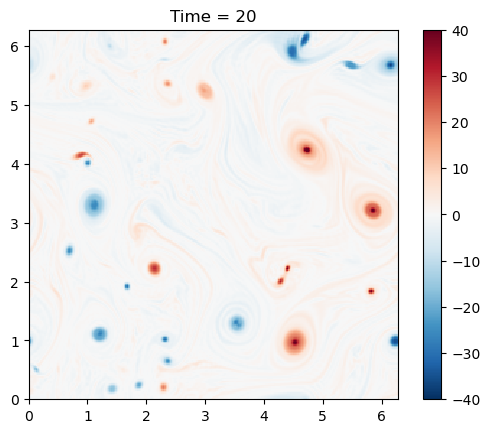

INFO: Step: 21000, Time: 2.10e+01, KE: 4.92e-01, CFL: 0.105
INFO: Step: 22000, Time: 2.20e+01, KE: 4.92e-01, CFL: 0.128
INFO: Step: 23000, Time: 2.30e+01, KE: 4.92e-01, CFL: 0.137
INFO: Step: 24000, Time: 2.40e+01, KE: 4.92e-01, CFL: 0.108
INFO: Step: 25000, Time: 2.50e+01, KE: 4.92e-01, CFL: 0.110
INFO: Step: 26000, Time: 2.60e+01, KE: 4.92e-01, CFL: 0.113
INFO: Step: 27000, Time: 2.70e+01, KE: 4.92e-01, CFL: 0.108
INFO: Step: 28000, Time: 2.80e+01, KE: 4.92e-01, CFL: 0.100
INFO: Step: 29000, Time: 2.90e+01, KE: 4.92e-01, CFL: 0.093
INFO: Step: 30000, Time: 3.00e+01, KE: 4.92e-01, CFL: 0.099


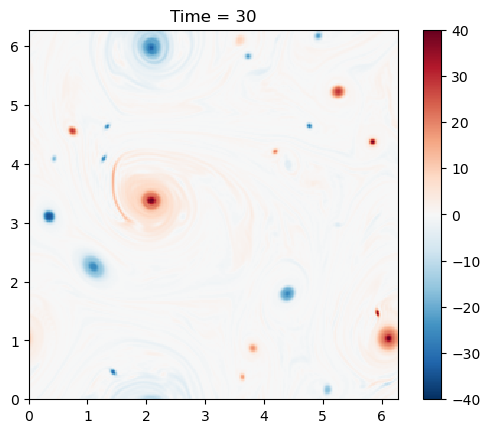

INFO: Step: 31000, Time: 3.10e+01, KE: 4.92e-01, CFL: 0.115
INFO: Step: 32000, Time: 3.20e+01, KE: 4.92e-01, CFL: 0.107
INFO: Step: 33000, Time: 3.30e+01, KE: 4.92e-01, CFL: 0.096
INFO: Step: 34000, Time: 3.40e+01, KE: 4.92e-01, CFL: 0.096
INFO: Step: 35000, Time: 3.50e+01, KE: 4.92e-01, CFL: 0.111
INFO: Step: 36000, Time: 3.60e+01, KE: 4.92e-01, CFL: 0.136
INFO: Step: 37000, Time: 3.70e+01, KE: 4.92e-01, CFL: 0.120
INFO: Step: 38000, Time: 3.80e+01, KE: 4.92e-01, CFL: 0.110
INFO: Step: 39000, Time: 3.90e+01, KE: 4.92e-01, CFL: 0.101
INFO: Step: 40000, Time: 4.00e+01, KE: 4.92e-01, CFL: 0.105


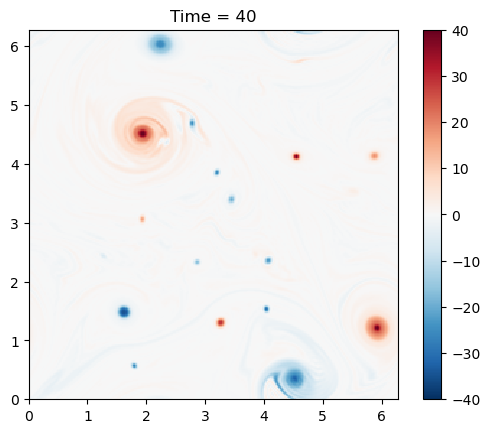

In [9]:
for _ in m_qg.run_with_snapshots(tsnapstart=0, tsnapint=10):
    plot_q(m_qg)

INFO: Step: 400, Time: 4.00e-01, KE: 4.95e-01, CFL: 0.120
INFO: Step: 800, Time: 8.00e-01, KE: 4.89e-01, CFL: 0.121
INFO: Step: 1200, Time: 1.20e+00, KE: 4.82e-01, CFL: 0.124
INFO: Step: 1600, Time: 1.60e+00, KE: 4.74e-01, CFL: 0.142
INFO: Step: 2000, Time: 2.00e+00, KE: 4.66e-01, CFL: 0.124
INFO: Step: 2400, Time: 2.40e+00, KE: 4.58e-01, CFL: 0.130
INFO: Step: 2800, Time: 2.80e+00, KE: 4.49e-01, CFL: 0.158
INFO: Step: 3200, Time: 3.20e+00, KE: 4.41e-01, CFL: 0.158
INFO: Step: 3600, Time: 3.60e+00, KE: 4.32e-01, CFL: 0.152
INFO: Step: 4000, Time: 4.00e+00, KE: 4.24e-01, CFL: 0.128
INFO: Step: 4400, Time: 4.40e+00, KE: 4.16e-01, CFL: 0.135
INFO: Step: 4800, Time: 4.80e+00, KE: 4.09e-01, CFL: 0.114
INFO: Step: 5200, Time: 5.20e+00, KE: 4.02e-01, CFL: 0.167
INFO: Step: 5600, Time: 5.60e+00, KE: 3.95e-01, CFL: 0.173
INFO: Step: 6000, Time: 6.00e+00, KE: 3.89e-01, CFL: 0.121
INFO: Step: 6400, Time: 6.40e+00, KE: 3.83e-01, CFL: 0.105
INFO: Step: 6800, Time: 6.80e+00, KE: 3.78e-01, CFL: 0.107

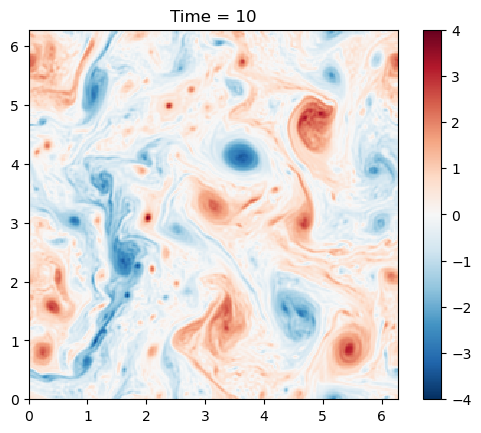

INFO: Step: 10400, Time: 1.04e+01, KE: 3.36e-01, CFL: 0.120
INFO: Step: 10800, Time: 1.08e+01, KE: 3.32e-01, CFL: 0.111
INFO: Step: 11200, Time: 1.12e+01, KE: 3.28e-01, CFL: 0.110
INFO: Step: 11600, Time: 1.16e+01, KE: 3.24e-01, CFL: 0.097
INFO: Step: 12000, Time: 1.20e+01, KE: 3.21e-01, CFL: 0.118
INFO: Step: 12400, Time: 1.24e+01, KE: 3.17e-01, CFL: 0.096
INFO: Step: 12800, Time: 1.28e+01, KE: 3.14e-01, CFL: 0.100
INFO: Step: 13200, Time: 1.32e+01, KE: 3.11e-01, CFL: 0.118
INFO: Step: 13600, Time: 1.36e+01, KE: 3.09e-01, CFL: 0.098
INFO: Step: 14000, Time: 1.40e+01, KE: 3.06e-01, CFL: 0.098
INFO: Step: 14400, Time: 1.44e+01, KE: 3.04e-01, CFL: 0.107
INFO: Step: 14800, Time: 1.48e+01, KE: 3.02e-01, CFL: 0.089
INFO: Step: 15200, Time: 1.52e+01, KE: 3.00e-01, CFL: 0.100
INFO: Step: 15600, Time: 1.56e+01, KE: 2.98e-01, CFL: 0.102
INFO: Step: 16000, Time: 1.60e+01, KE: 2.95e-01, CFL: 0.094
INFO: Step: 16400, Time: 1.64e+01, KE: 2.93e-01, CFL: 0.111
INFO: Step: 16800, Time: 1.68e+01, KE: 2

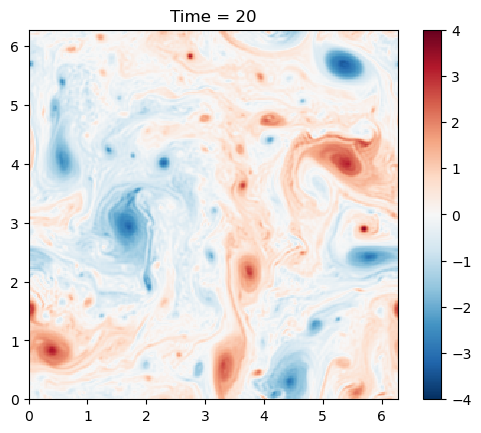

INFO: Step: 20400, Time: 2.04e+01, KE: 2.72e-01, CFL: 0.092
INFO: Step: 20800, Time: 2.08e+01, KE: 2.70e-01, CFL: 0.089
INFO: Step: 21200, Time: 2.12e+01, KE: 2.68e-01, CFL: 0.104
INFO: Step: 21600, Time: 2.16e+01, KE: 2.66e-01, CFL: 0.085
INFO: Step: 22000, Time: 2.20e+01, KE: 2.64e-01, CFL: 0.088
INFO: Step: 22400, Time: 2.24e+01, KE: 2.62e-01, CFL: 0.096
INFO: Step: 22800, Time: 2.28e+01, KE: 2.61e-01, CFL: 0.091
INFO: Step: 23200, Time: 2.32e+01, KE: 2.59e-01, CFL: 0.090
INFO: Step: 23600, Time: 2.36e+01, KE: 2.58e-01, CFL: 0.088
INFO: Step: 24000, Time: 2.40e+01, KE: 2.56e-01, CFL: 0.086
INFO: Step: 24400, Time: 2.44e+01, KE: 2.55e-01, CFL: 0.084
INFO: Step: 24800, Time: 2.48e+01, KE: 2.54e-01, CFL: 0.085
INFO: Step: 25200, Time: 2.52e+01, KE: 2.53e-01, CFL: 0.107
INFO: Step: 25600, Time: 2.56e+01, KE: 2.51e-01, CFL: 0.087
INFO: Step: 26000, Time: 2.60e+01, KE: 2.50e-01, CFL: 0.096
INFO: Step: 26400, Time: 2.64e+01, KE: 2.49e-01, CFL: 0.109
INFO: Step: 26800, Time: 2.68e+01, KE: 2

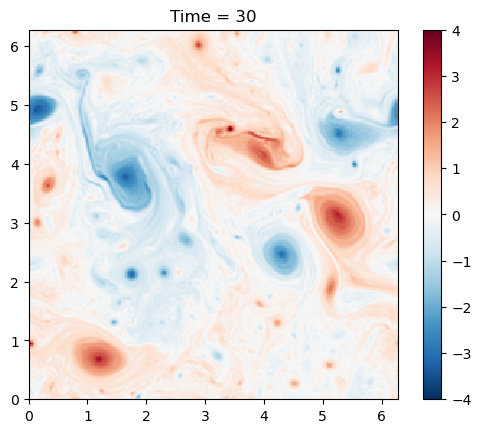

INFO: Step: 30400, Time: 3.04e+01, KE: 2.38e-01, CFL: 0.091
INFO: Step: 30800, Time: 3.08e+01, KE: 2.37e-01, CFL: 0.096
INFO: Step: 31200, Time: 3.12e+01, KE: 2.36e-01, CFL: 0.087
INFO: Step: 31600, Time: 3.16e+01, KE: 2.35e-01, CFL: 0.089
INFO: Step: 32000, Time: 3.20e+01, KE: 2.34e-01, CFL: 0.105
INFO: Step: 32400, Time: 3.24e+01, KE: 2.33e-01, CFL: 0.091
INFO: Step: 32800, Time: 3.28e+01, KE: 2.32e-01, CFL: 0.098
INFO: Step: 33200, Time: 3.32e+01, KE: 2.31e-01, CFL: 0.102
INFO: Step: 33600, Time: 3.36e+01, KE: 2.30e-01, CFL: 0.087
INFO: Step: 34000, Time: 3.40e+01, KE: 2.29e-01, CFL: 0.080
INFO: Step: 34400, Time: 3.44e+01, KE: 2.28e-01, CFL: 0.085
INFO: Step: 34800, Time: 3.48e+01, KE: 2.27e-01, CFL: 0.083
INFO: Step: 35200, Time: 3.52e+01, KE: 2.26e-01, CFL: 0.092
INFO: Step: 35600, Time: 3.56e+01, KE: 2.25e-01, CFL: 0.088
INFO: Step: 36000, Time: 3.60e+01, KE: 2.24e-01, CFL: 0.091
INFO: Step: 36400, Time: 3.64e+01, KE: 2.24e-01, CFL: 0.084
INFO: Step: 36800, Time: 3.68e+01, KE: 2

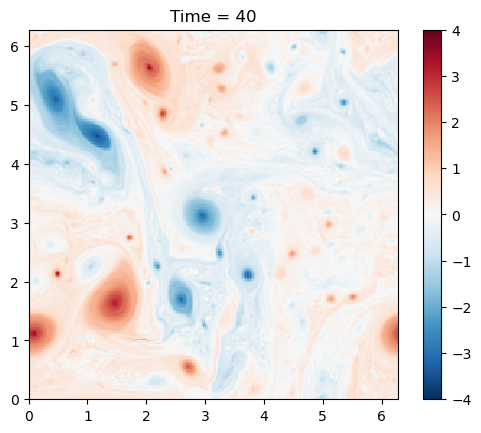

In [10]:
for _ in m_sqg.run_with_snapshots(tsnapstart=0, tsnapint=10):
    plot_b(m_sqg)

In [11]:
energy_qg     = m_qg.get_diagnostic('KEspec')
enstrophy_qg  = m_qg.get_diagnostic('Ensspec')

energy_sqg    = m_sqg.get_diagnostic('KEspec')
enstrophy_sqg = m_sqg.get_diagnostic('Ensspec')

In [12]:
# this makes it easy to calculate an isotropic spectrum
kr, energy_iso_qg    = tools.calc_ispec(m_qg, energy_qg.squeeze())
_, enstrophy_iso_qg  = tools.calc_ispec(m_qg, enstrophy_qg.squeeze())

kr, energy_iso_sqg   = tools.calc_ispec(m_sqg, energy_sqg.squeeze())
_, enstrophy_iso_sqg = tools.calc_ispec(m_sqg, enstrophy_sqg.squeeze())

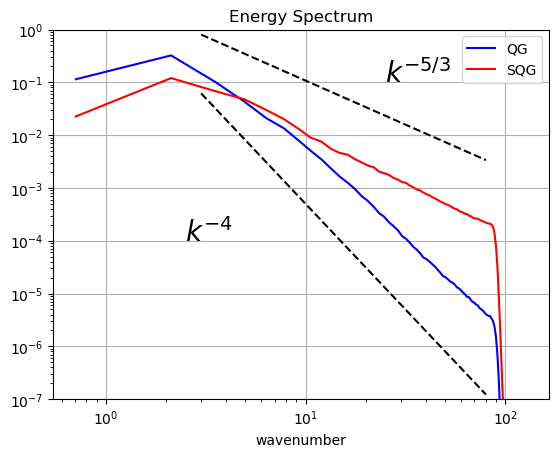

In [13]:
ks = np.array([3.,80])
es1 = 5*ks**-4
es2 = 5*ks**(-5/3)
plt.loglog(kr, energy_iso_qg,  '-b', label='QG')
plt.loglog(kr, energy_iso_sqg, '-r', label='SQG')
plt.loglog(ks, es1, 'k--')
plt.text(2.5,.0001,r'$k^{-4}$',fontsize=20)
plt.loglog(ks, es2, 'k--')
plt.text(25,.1,r'$k^{-5/3}$',fontsize=20)
plt.ylim(1.e-7,1.e0)
plt.xlabel('wavenumber')
plt.title('Energy Spectrum')
plt.grid()
plt.legend()

plt.savefig('QG_SQG_free_spectra', facecolor='white')

In [31]:
np.savez('QG_SQG_spectra_Nx256.npz', ks=ks, kr=kr, energy_iso_qg=energy_iso_qg, energy_iso_sqg=energy_iso_sqg, fix_imports=True)

In [32]:
loaded_data = np.load('QG_SQG_spectra_Nx256.npz', allow_pickle=True)

In [35]:
ks = loaded_data['ks']
kr = loaded_data['kr']
energy_iso_qg = loaded_data['energy_iso_qg']
energy_iso_sqg = loaded_data['energy_iso_sqg']